In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
churn=pd.read_excel('Churn.xlsx',index_col='Unnamed: 0')

In [4]:
churn.head(1)

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1,KS,area_code_415,128,yes,25,no,10.0,3,2.7,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   object 
 12  eve.mins        5000 non-null   object 
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   float6

In [6]:
churn.describe()

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [7]:
df=churn.copy()

# Lets Check presence of Duplicate value

- Conclusion: Theres is no Duplicate values present in Dataset

In [10]:
df[df.duplicated()]

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn


# Lets Check for Null values

- No null values present in data

In [13]:
df.isnull().sum()

state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [14]:
df.columns

Index(['state', 'area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls', 'churn'],
      dtype='object')

# Lets check How many categories are there in Categorical columns

- It seems **day.charge** and **eve.mins** should be in Float data type but it is in object data type

In [17]:
for i in df.columns:
    if df[i].dtype == 'object':
        a=df[i]
        print(a.value_counts())
        print('------------------------------------------------------')

state
WV    158
MN    125
AL    124
ID    119
VA    118
OH    116
TX    116
WY    115
NY    114
OR    114
NJ    112
UT    112
WI    106
MI    103
ME    103
MA    103
MD    102
VT    101
MT     99
RI     99
KY     99
MS     99
CT     99
KS     99
WA     98
IN     98
CO     96
NH     95
DE     94
MO     93
AR     92
NM     91
NC     91
SC     91
FL     90
NV     90
OK     90
TN     89
AZ     89
DC     88
IL     88
NE     88
ND     88
HI     86
SD     85
GA     83
LA     82
PA     77
AK     72
IA     69
CA     52
Name: count, dtype: int64
------------------------------------------------------
area.code
area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: count, dtype: int64
------------------------------------------------------
voice.plan
no     3677
yes    1323
Name: count, dtype: int64
------------------------------------------------------
intl.plan
no     4527
yes     473
Name: count, dtype: int64
------------------------------------------------------
day.charge
26.1

# Lets change the Data type of "day.charge", "eve.mins" and convert it into category

In [19]:
for i in ['day.charge','eve.mins']:
    df[i] = pd.to_numeric(df[i], errors='coerce')


In [20]:
# Lets check presence of null values in  'day.charge','eve.mins' columns

In [21]:
for i in ['day.charge','eve.mins']:
    print("Null values in ",i,':',df[i].isnull().sum())

Null values in  day.charge : 7
Null values in  eve.mins : 24


- We can clearly see that **"day.charge"** and **eve.mins** has null values

- we observe that in Day time per minute cost is 0.17 so we can find this null values in day charge column

In [24]:
df['day.charge'].fillna(0.17*df['day.mins'],axis=0,inplace=True)

In [25]:
df['day.charge'].isnull().sum()

0

- we observe that in Evening time per minute cost is 0.085 so we can find this null values in eve.mins column

In [27]:
(df['eve.mins'].isnull().sum()/len(df['day.charge']))*100

0.48

In [28]:
df['eve.mins'].fillna(df['eve.charge']/0.085,axis=0,inplace=True)

In [29]:
df['eve.mins'].isnull().sum()

0

In [30]:
df.isnull().sum()

state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

#### lets segregate numerical column and categorical columns

In [32]:
numerical_columns=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_columns=[feature for feature in df.columns if df[feature].dtype=='O']

In [33]:
print("Categorical columns=",categorical_columns)
print("Numerical columns=",numerical_columns)


Categorical columns= ['state', 'area.code', 'voice.plan', 'intl.plan', 'churn']
Numerical columns= ['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge', 'customer.calls']


# No null values present in categorical columns

In [35]:
for i in categorical_columns:
    print(i,"=",df[i].unique())
    print("---------------------------------------------------")

state = ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
---------------------------------------------------
area.code = ['area_code_415' 'area_code_408' 'area_code_510']
---------------------------------------------------
voice.plan = ['yes' 'no']
---------------------------------------------------
intl.plan = ['no' 'yes']
---------------------------------------------------
churn = ['no' 'yes']
---------------------------------------------------


# Univariate Analysis for Categorical variable
- only 10% prople have international calls plan and probability of churned is also high those who have international plans


<Axes: xlabel='intl.plan', ylabel='count'>

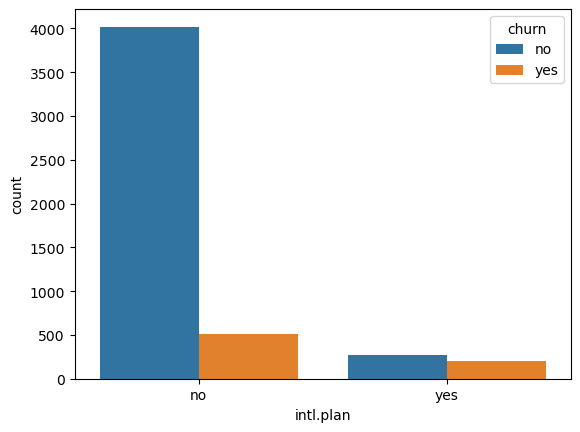

In [37]:
# df['intl.plan'].value_counts().plot(kind='pie',autopct='%0.1f%%')
sns.countplot(data=df,x='intl.plan',hue='churn')


- 26% prople have voice call plan. 
- The probability of leaving the telecom service seems low for those who do not have a voice plan, but for those who have a voice plan, the chances of leaving the telecom service are higher

<Axes: xlabel='voice.plan', ylabel='count'>

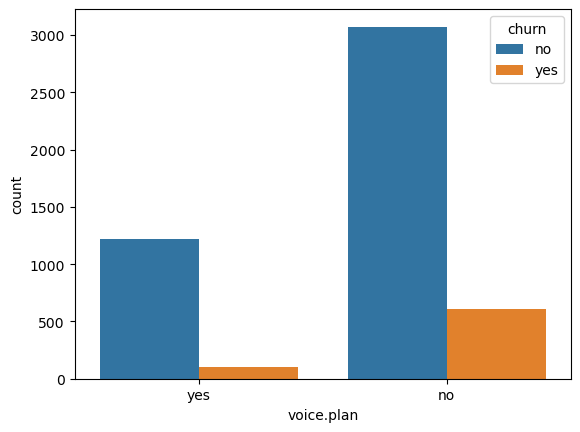

In [39]:
# df['voice.plan'].value_counts().plot(kind='pie',autopct='%0.1f%%')
sns.countplot(data=df,x='voice.plan',hue='churn')


- There doesn’t seem to be any significant churn from any state overall.

<Axes: xlabel='state', ylabel='count'>

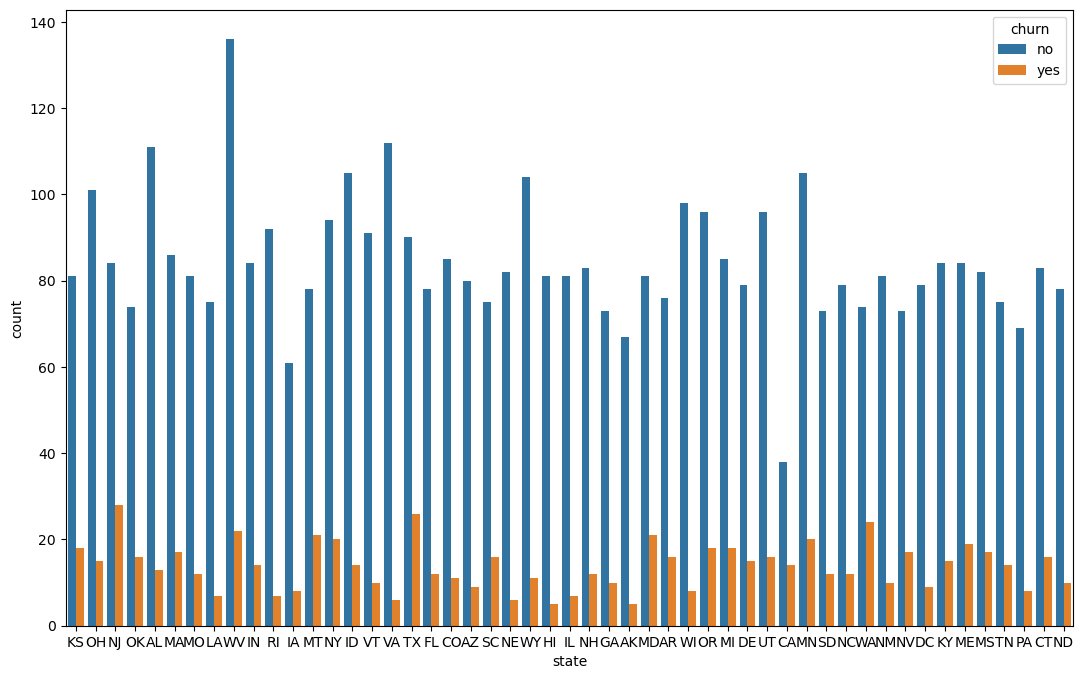

In [41]:
plt.figure(figsize=(13,8))
# df['state'].value_counts().plot(kind='bar')
sns.countplot(data=df,x='state',hue='churn')

- 50% peoples are belongs to 'area_code_415' area
- there doesn’t seem to be any changes on an area code-wise basis either

<Axes: xlabel='area.code', ylabel='count'>

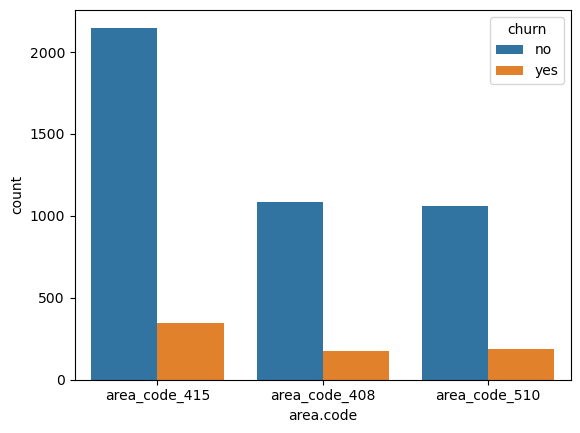

In [43]:
# df['area.code'].value_counts().plot(kind='pie',autopct='%0.1f%%')
sns.countplot(data=df,x='area.code',hue='churn')


- As **Churn** is our output feature and 85% people continue company's service so this Data is Imbalanced 


<Axes: ylabel='count'>

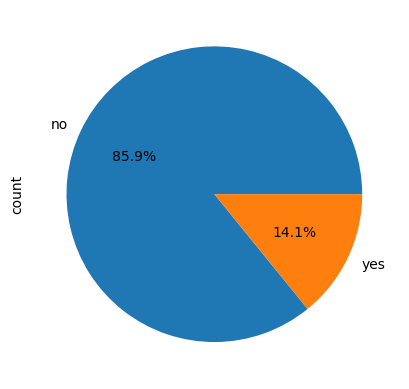

In [45]:
df['churn'].value_counts().plot(kind='pie',autopct='%0.1f%%')

# Bivariate Analysis for categorical features
['state', 'area.code', 'voice.plan', 'intl.plan', 'churn']

# Conclusion
- It seems Customer are **not Happy** with company's **internation calls plan**.we can see that out of 100 customer 9 customers had a international plans but 4 of them are churned
- area.code wise churned rate is same 

In [48]:
pd.crosstab(df['intl.plan'],df['churn'],normalize=True)*100


churn,no,yes
intl.plan,,
no,80.38,10.16
yes,5.48,3.98


In [49]:
pd.crosstab(df['voice.plan'],df['churn'],normalize=True)*100


churn,no,yes
voice.plan,,
no,61.44,12.10
yes,24.42,2.04


In [50]:
pd.crosstab(df['area.code'],df['churn'],normalize=True)*100

churn,no,yes
area.code,,
area_code_408,21.64,3.54
area_code_415,42.98,6.92
area_code_510,21.24,3.68


In [51]:
pd.crosstab(df['state'],df['churn'],normalize=True)*100


churn,no,yes
state,,
AK,1.34,0.10
AL,2.22,0.26
AR,1.52,0.32
AZ,1.60,0.18
CA,0.76,0.28
CO,1.70,0.22
CT,1.66,0.32
DC,1.58,0.18
DE,1.58,0.30


# Univariate Analysis for Numerical columns
- **Outliers are present in our columns**

In [53]:
for i in numerical_columns:
    print(i)
    print(df[i].describe())
    print('______________________________________')

account.length
count    5000.00000
mean      100.25860
std        39.69456
min         1.00000
25%        73.00000
50%       100.00000
75%       127.00000
max       243.00000
Name: account.length, dtype: float64
______________________________________
voice.messages
count    5000.000000
mean        7.755200
std        13.546393
min         0.000000
25%         0.000000
50%         0.000000
75%        17.000000
max        52.000000
Name: voice.messages, dtype: float64
______________________________________
intl.mins
count    5000.000000
mean       10.261780
std         2.761396
min         0.000000
25%         8.500000
50%        10.300000
75%        12.000000
max        20.000000
Name: intl.mins, dtype: float64
______________________________________
intl.calls
count    5000.000000
mean        4.435200
std         2.456788
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: intl.calls, dtype: float64
_____________________________

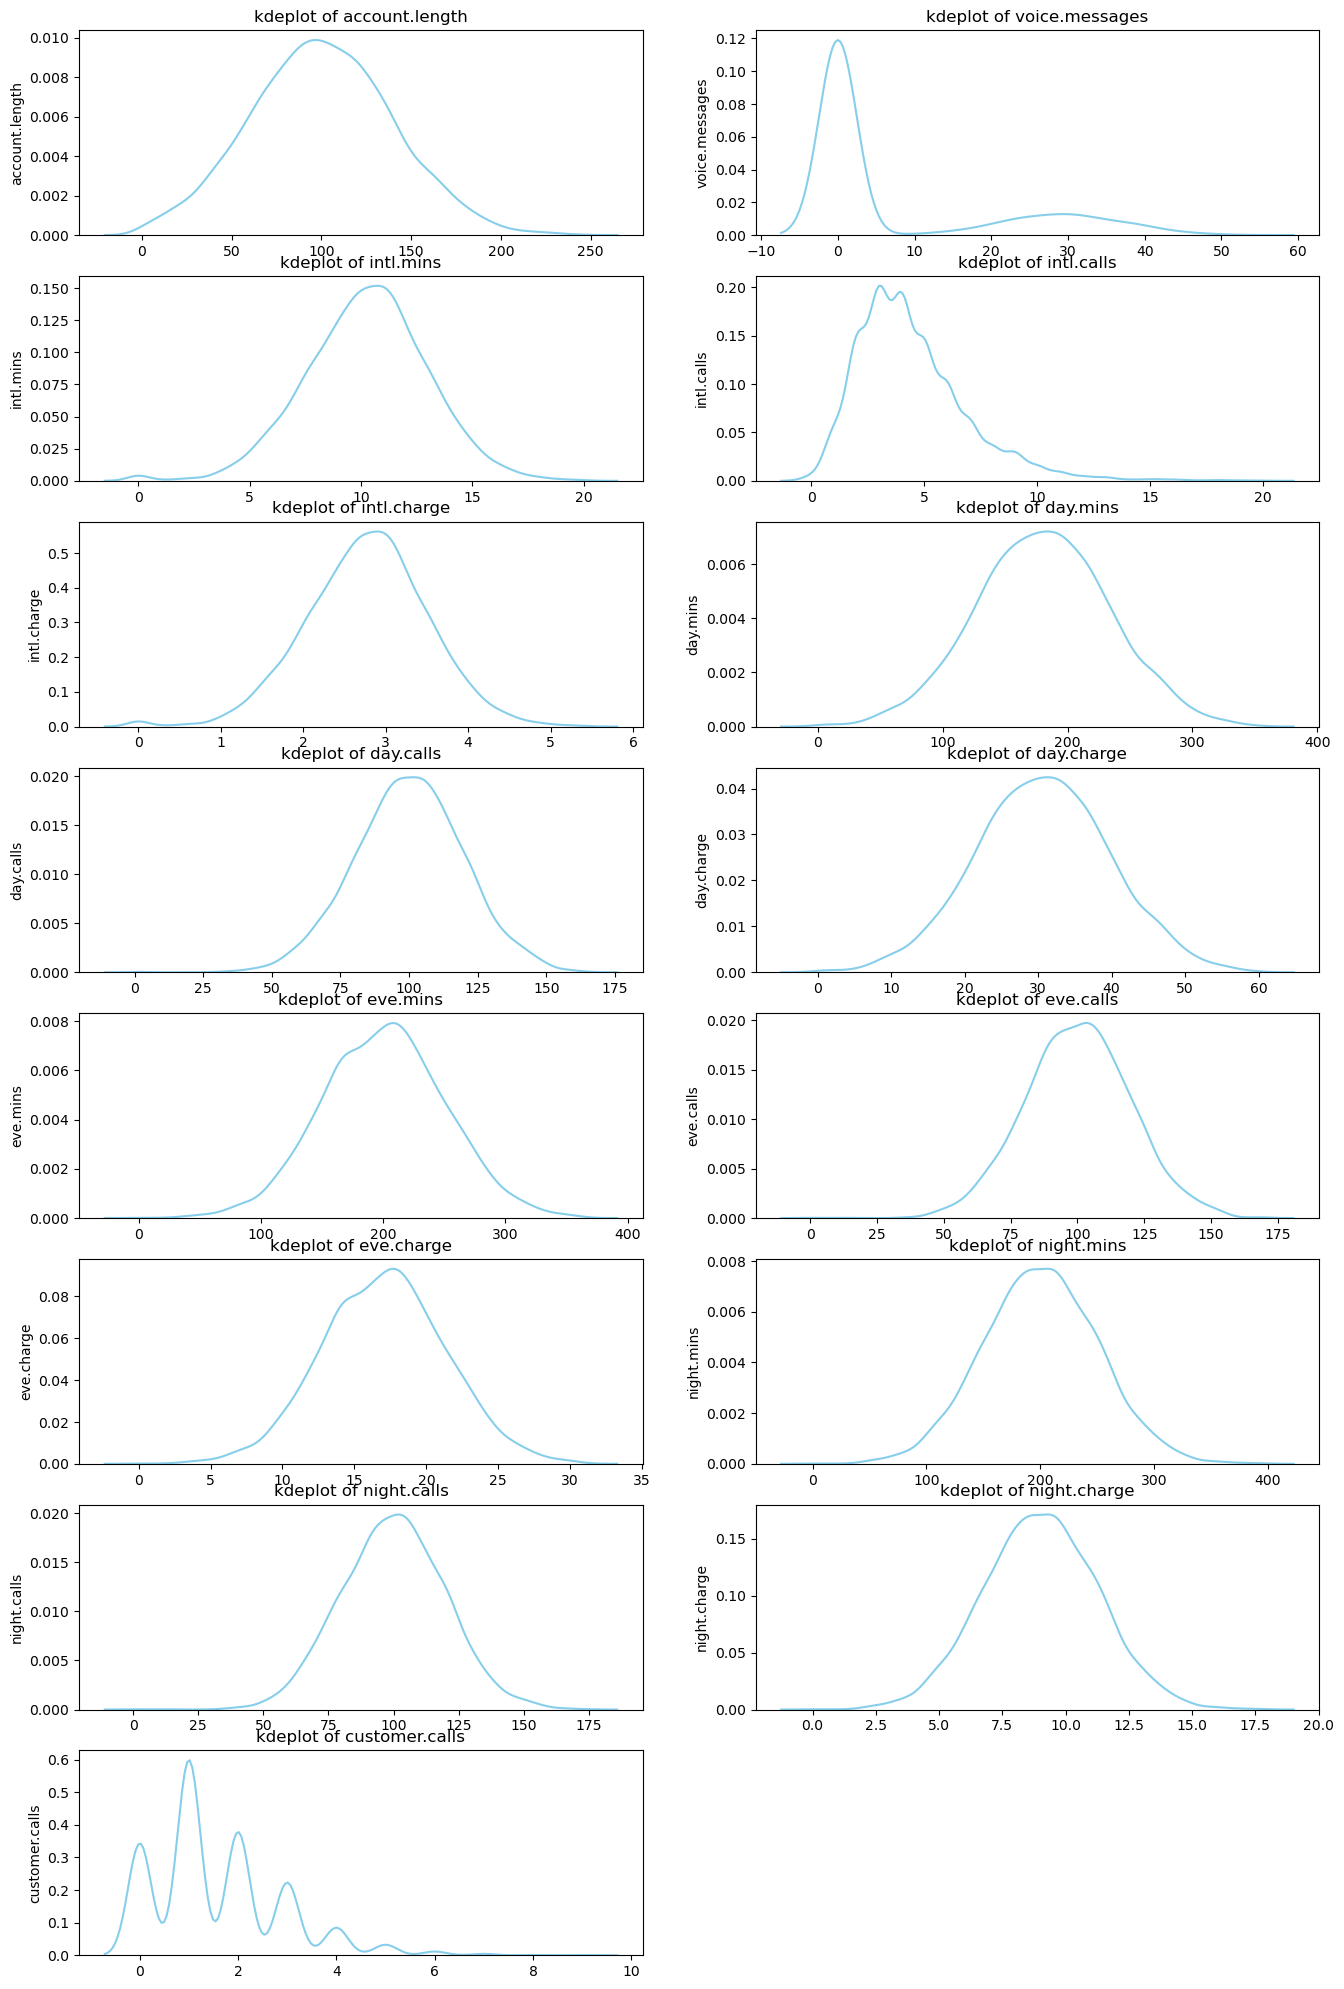

In [54]:
#plotting a kdeplot
plt.figure(figsize=(16, 25)) 
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(8, 2, i) 
    sns.kdeplot(x=df[column], color='skyblue')
    plt.title(f'kdeplot of {column}')
    plt.xlabel('') 
    plt.ylabel(column)



plt.show()

<Axes: xlabel='churn'>

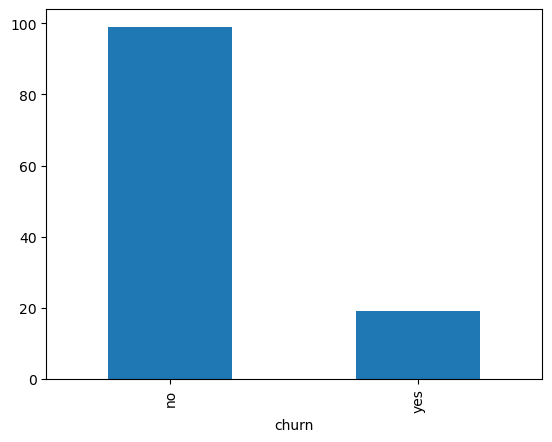

In [55]:
# df['voice.messages'].plot(kind='box')   
# df['intl.calls'].plot(kind='box')   
df[df['voice.messages']>42]['churn'].value_counts().plot(kind='bar')
df[df['intl.calls']>10]['churn'].value_counts().plot(kind='bar')


In [56]:
df['intl.calls'].value_counts()

intl.calls
3     992
4     953
2     743
5     706
6     495
7     308
1     265
8     172
9     148
10     76
11     45
0      24
12     23
13     19
15      9
16      7
14      6
18      4
19      2
17      2
20      1
Name: count, dtype: int64

- following columns follows kind of normal distribution **account.length,intl.mins,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge**
- **intl.calls** right skewed ,**voice.messages** right skewed and may be bimodal
- **customer.calls** is seems multimodal

In [58]:
# plt.figure(figsize=())
# sns.pairplot(df[numerical_columns])

# Bivariate Analysis for Numerical

In [60]:
pair_plot_ke_liye=numerical_columns+['churn']
print(pair_plot_ke_liye)

['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge', 'customer.calls', 'churn']


# conclusion on the basis of Below plot
- something is fishy with Day charge and Day mins
- most churned customers are due to day charges
  

In [62]:
# plt.figure(figsize=(30,30))
# g = sns.PairGrid(data=df[pair_plot_ke_liye],hue='churn')
# g.map_lower(sns.scatterplot)

# Conclusion on the basis of Correlation
#### Perfectly correlation is given below. Multicollinearity issue will occur
- intl.charge and intl.mins 
- day.charge and day.mins
- night.charge and night.mins
- eve.charge and eve.mins
#### Other Numerical columns are not correlated with each other

<Axes: >

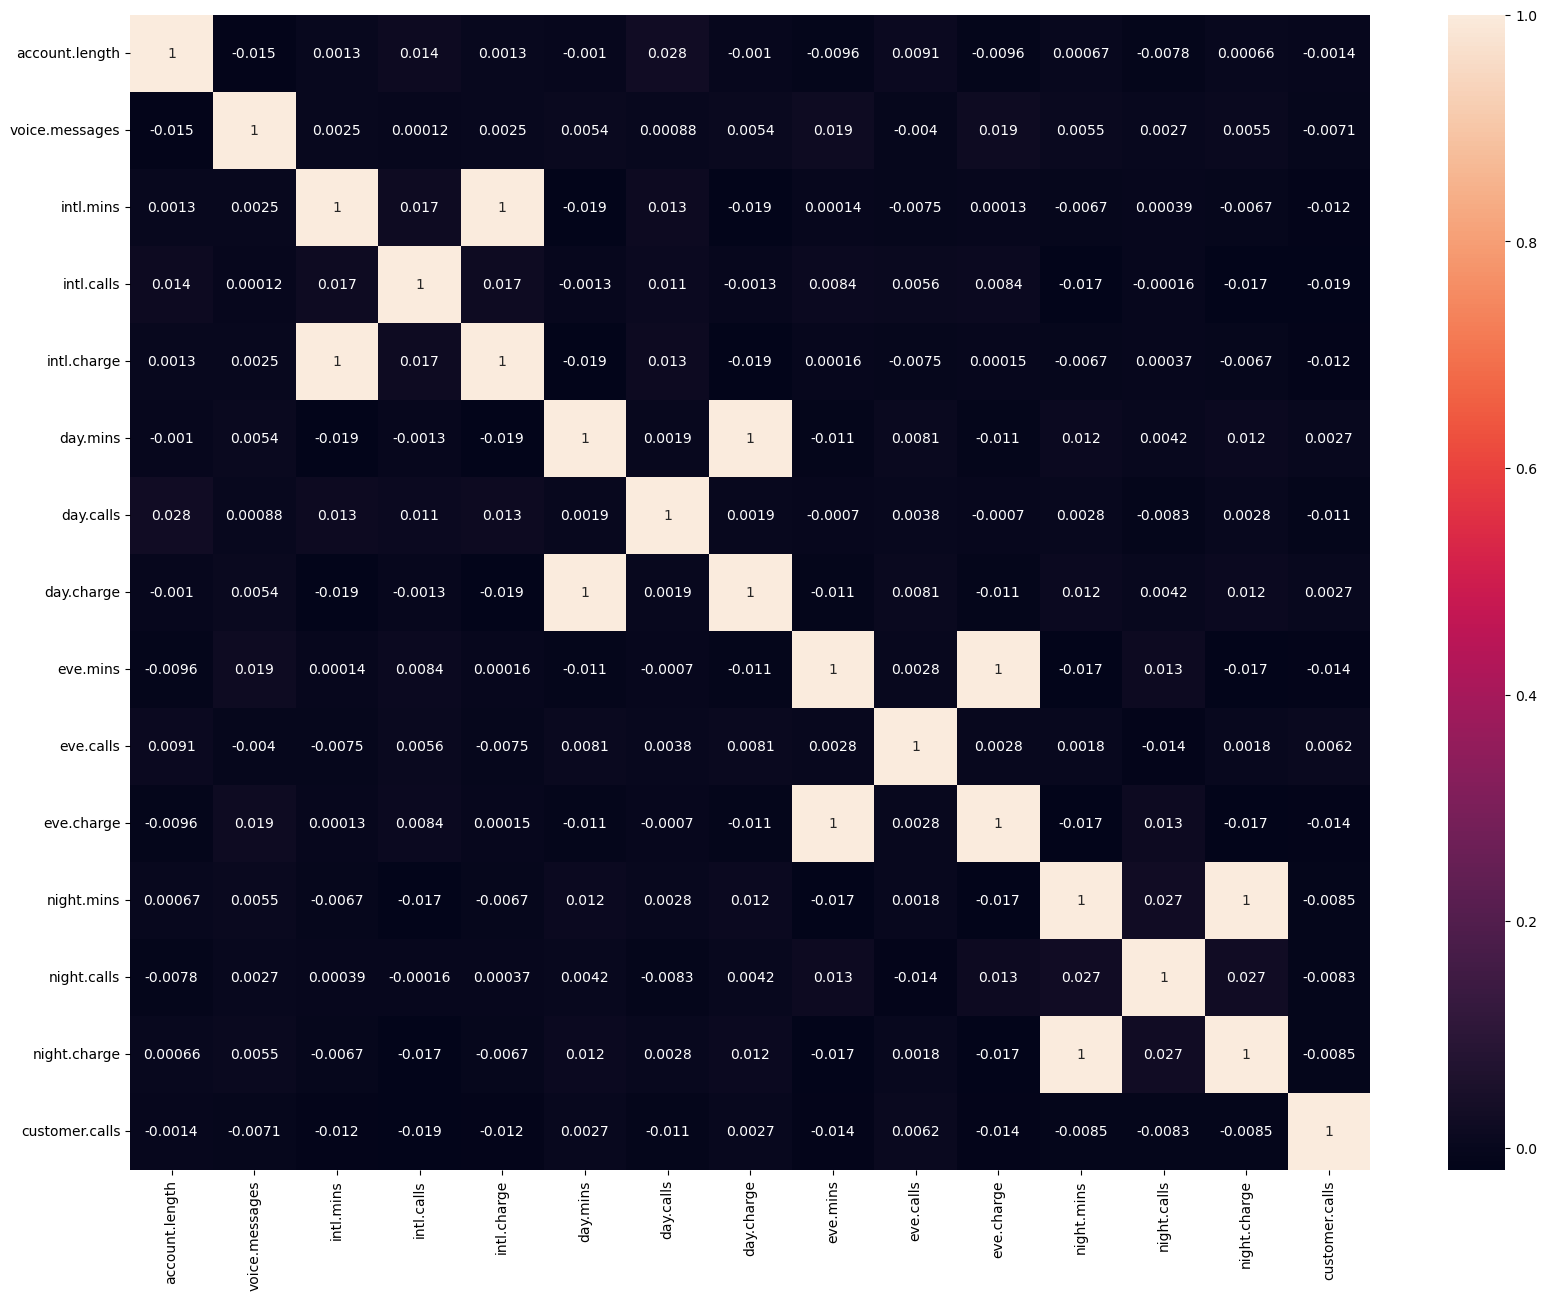

In [64]:
plt.figure(figsize=(20,15))
sns.heatmap(df[numerical_columns].corr(),annot=True)

# To verify relationship between day charge with other numerical columns

- Most of the churned customers are due Day charge

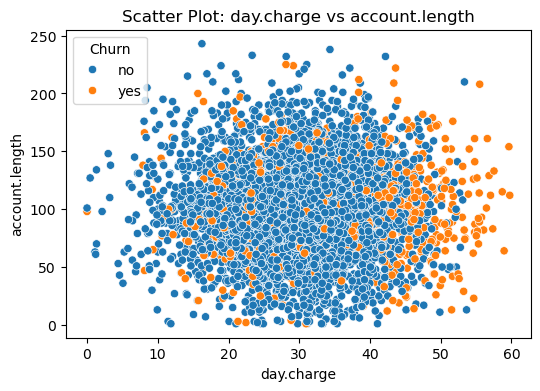

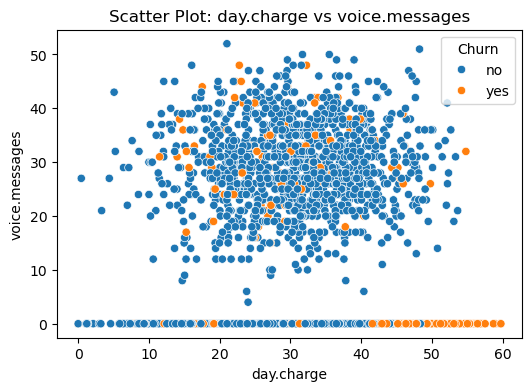

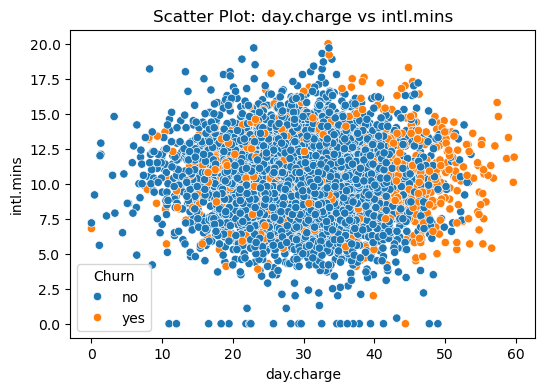

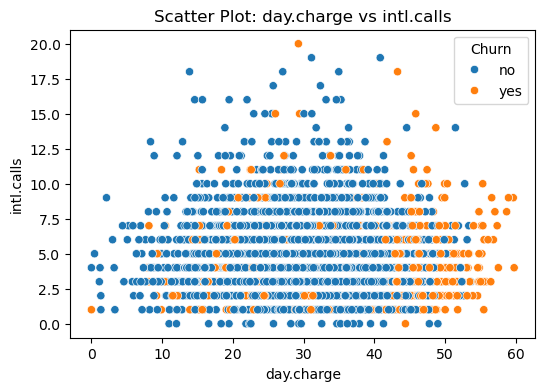

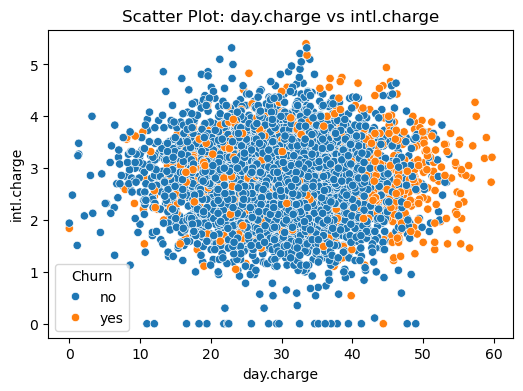

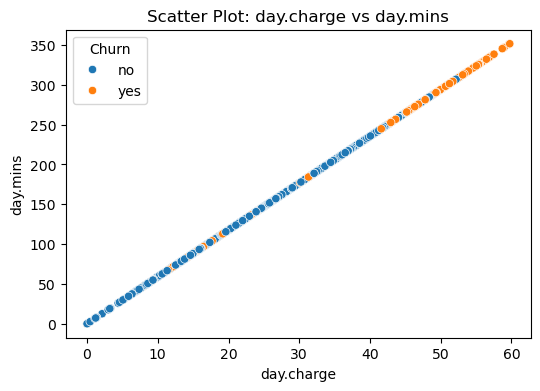

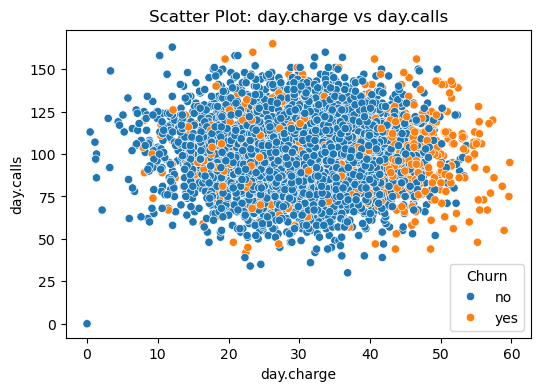

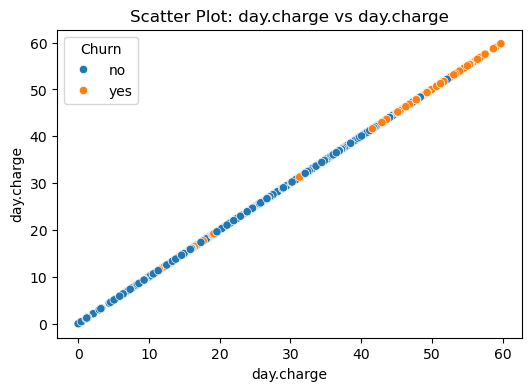

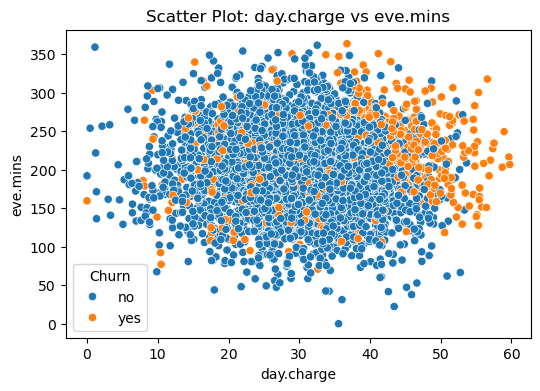

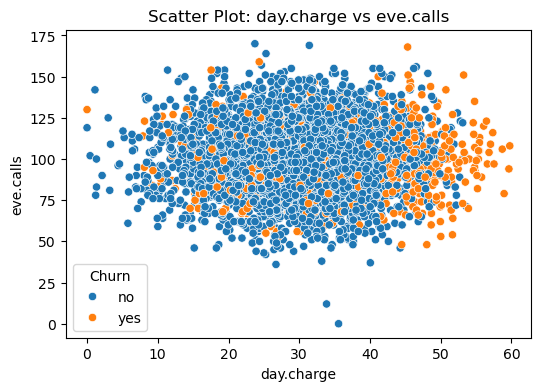

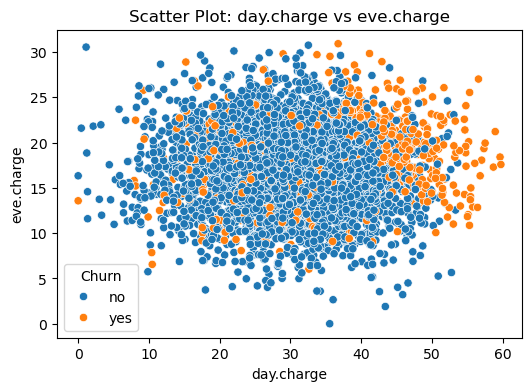

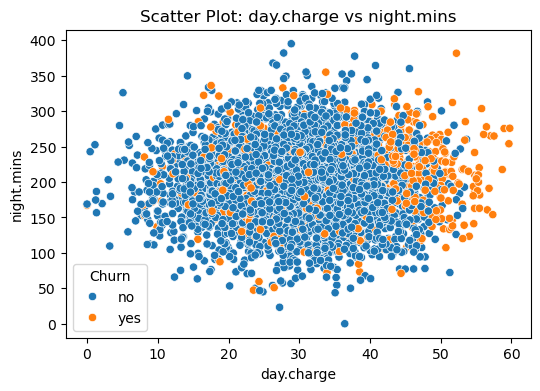

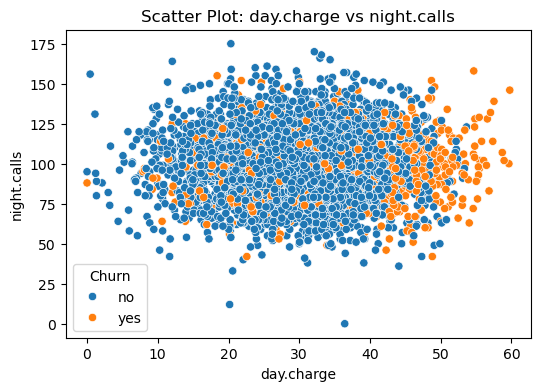

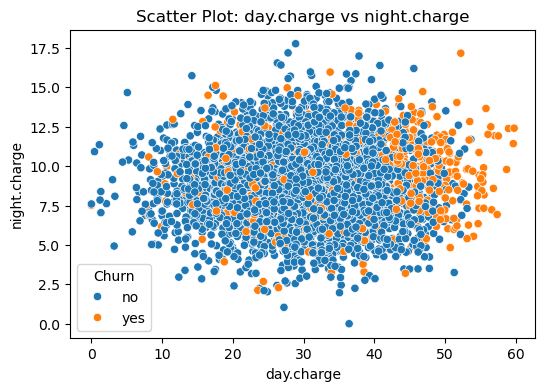

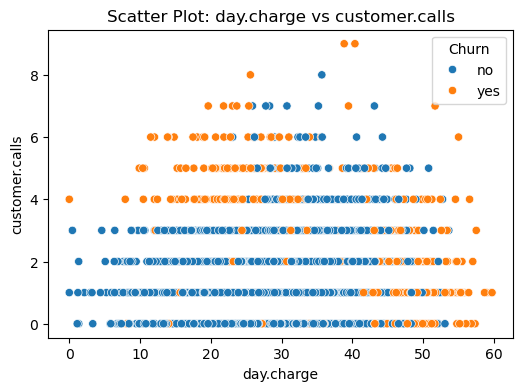

In [67]:
for i in numerical_columns:
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.scatterplot(x=df['day.charge'], y=df[i], hue=df['churn'])
    plt.title(f'Scatter Plot: day.charge vs {i}')
    plt.xlabel('day.charge')
    plt.ylabel(i)
    plt.legend(title='Churn')
    plt.show()

# NUmerical Vs Categorical 

In [69]:
# we will see Numerical columns distribution against Churn column

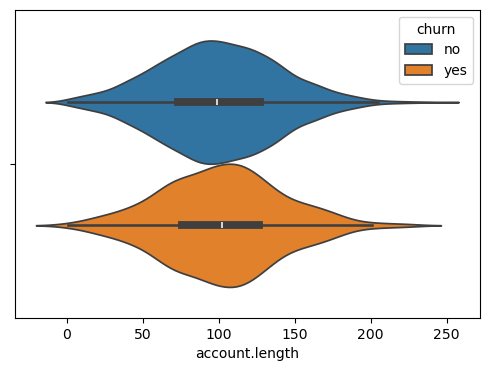

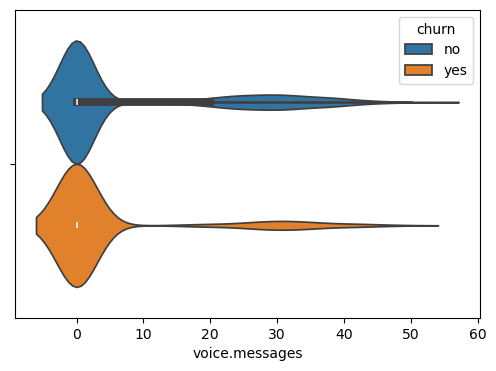

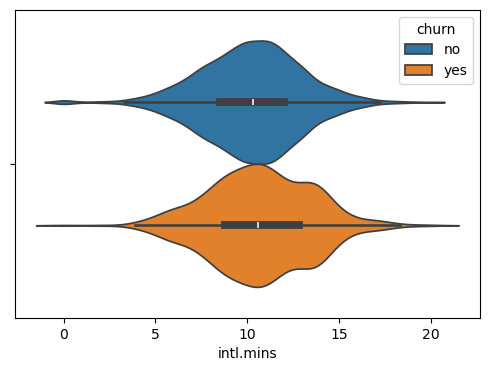

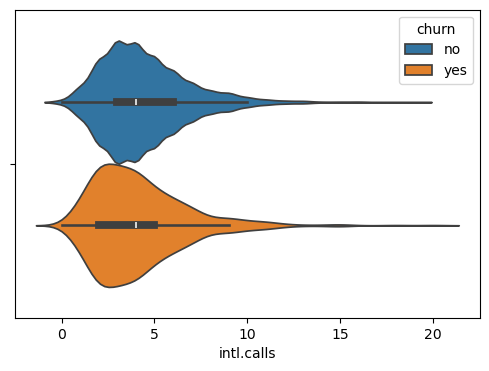

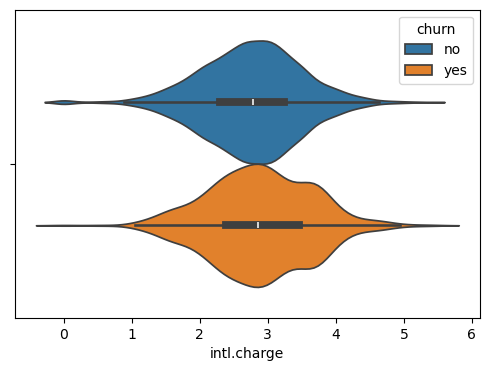

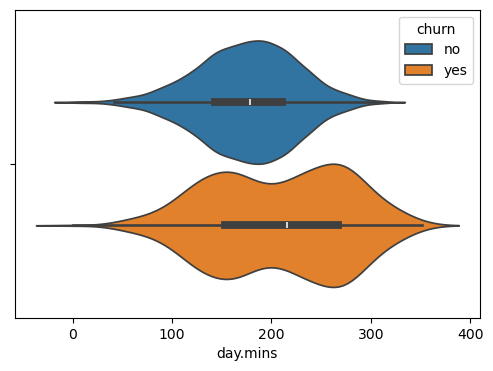

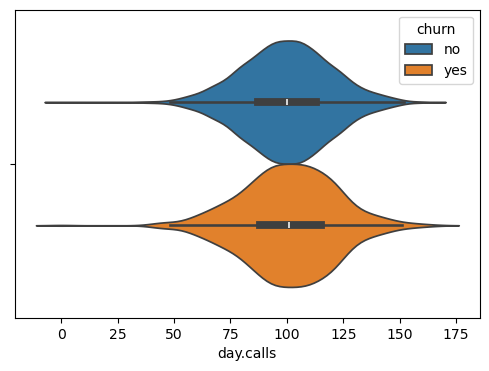

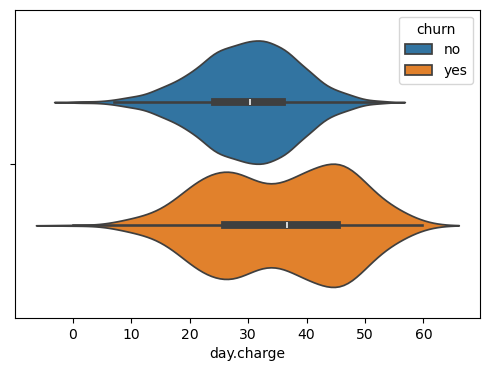

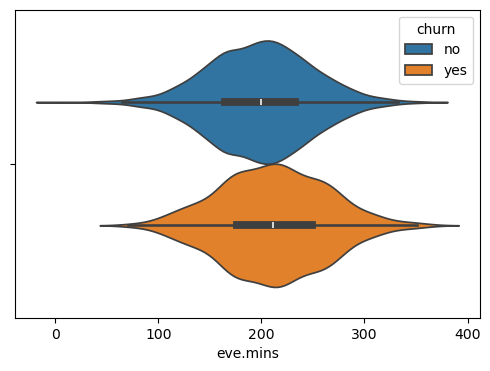

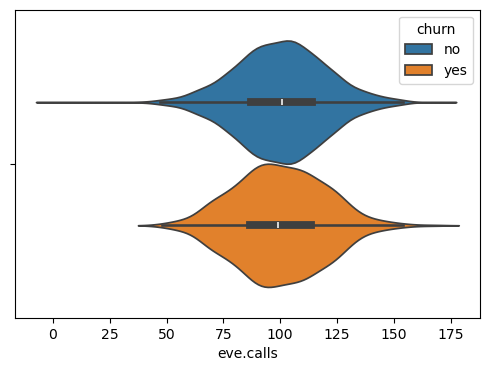

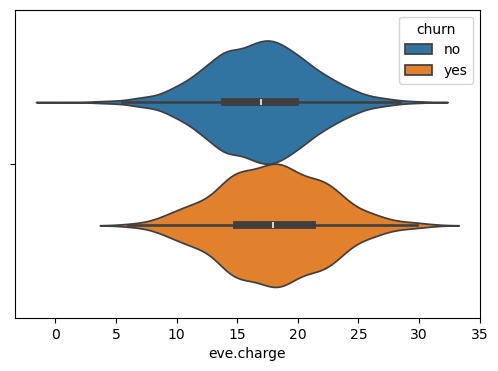

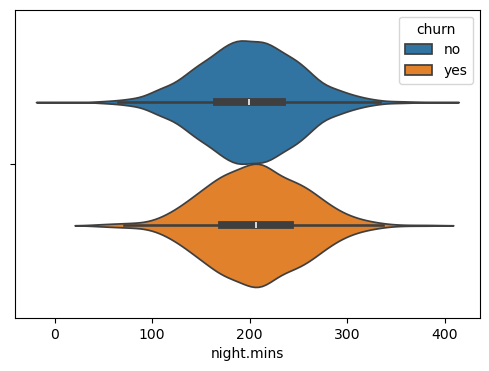

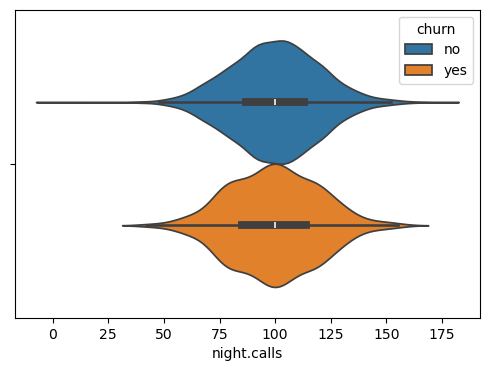

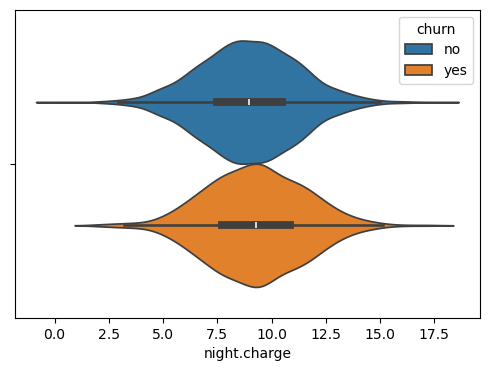

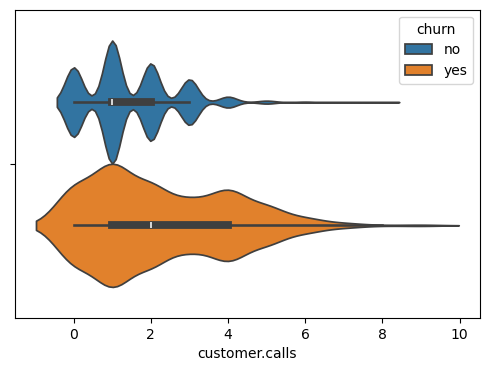

In [70]:
for i in numerical_columns:
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.violinplot(x=df[i], hue=df['churn'])
    # plt.title(f'Scatter Plot: day.charge vs {i}')
    # plt.xlabel('day.charge')
    # plt.ylabel(i)
    # plt.legend(title='Churn')
    plt.show()

In [71]:
# account.length has 35 outliers
# voice.messages has 60 outliers
# intl.mins has 70+ outliers
# intl.calls has 118 outliers
# intl.charge has 90 outliers
# day.mins has 44 outliers


In [72]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=['float64', 'int64']).columns:  # Only numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Extracting outliers
outliers = detect_outliers_iqr(df)

# Display outliers for each column
for col, values in outliers.items():
    print(col,'=',len(values))


account.length = 24
voice.messages = 60
intl.mins = 72
intl.calls = 118
intl.charge = 72
day.mins = 34
day.calls = 35
day.charge = 34
eve.mins = 43
eve.calls = 27
eve.charge = 42
night.mins = 39
night.calls = 43
night.charge = 39
customer.calls = 399


- Customer calls has too many outliers lets check it through box plot

<Axes: >

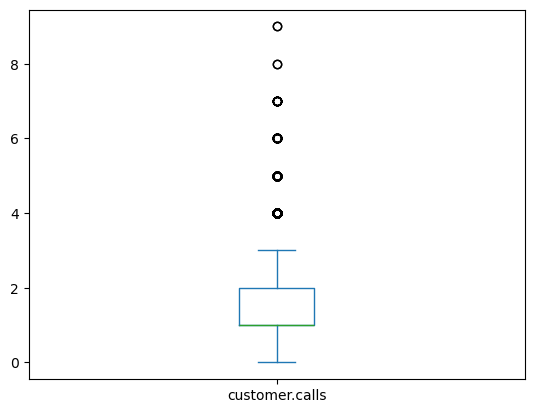

In [74]:
df['customer.calls'].plot(kind='box')

In [75]:
df['customer.calls'].value_counts()

customer.calls
1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: count, dtype: int64

- The "customer calls" column has only 9 unique values, and these values are repeated multiple times. Therefore, we will treat it as a categorical column.

- If customer called to customer service more than 3 times then probabilty is high that the person churned 

In [78]:
df[df['customer.calls']>=4]['churn'].value_counts()

churn
yes    201
no     198
Name: count, dtype: int64

# lets treat the outliers by capping

In [80]:
def cap_outliers_iqr(df):
    capped_df = df.copy()
    for column in df.select_dtypes(include=['float64', 'int64']).columns: 
        if column!='customer.calls':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Apply capping
            capped_df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return capped_df

In [81]:
df1 = cap_outliers_iqr(df)

In [82]:
outliers1 = detect_outliers_iqr(df1)

# Display outliers for each column
for col, values in outliers1.items():
    print(col,'=',len(values))


account.length = 0
voice.messages = 0
intl.mins = 0
intl.calls = 0
intl.charge = 0
day.mins = 0
day.calls = 0
day.charge = 0
eve.mins = 0
eve.calls = 0
eve.charge = 0
night.mins = 0
night.calls = 0
night.charge = 0
customer.calls = 399


- we can conclude that except customer.calls we treat all the outliers

In [84]:
df1.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1,KS,area_code_415,128,yes,25.0,no,10.0,3.0,2.70,265.1,110,45.07,197.4000,99.0,16.78,244.7,91,11.01,1,no
2,OH,area_code_415,107,yes,26.0,no,13.7,3.0,3.70,161.6,123,27.47,195.5000,103.0,16.62,254.4,103,11.45,1,no
3,NJ,area_code_415,137,no,0.0,no,12.2,5.0,3.29,243.4,114,41.38,121.2000,110.0,10.30,162.6,104,7.32,0,no
4,OH,area_code_408,84,no,0.0,yes,6.6,7.0,1.78,299.4,71,50.90,64.7875,88.0,5.50,196.9,89,8.86,2,no
5,OK,area_code_415,75,no,0.0,yes,10.1,3.0,2.73,166.7,113,28.34,148.3000,122.0,12.61,186.9,121,8.41,3,no


In [85]:
# Lets find categorical as well as numerical columns

In [86]:
numerical_columns=numerical_columns[:-1]

In [87]:
categorical_columns.append('customer.calls')

In [341]:
print('Categorical columns are:',categorical_columns)
print('Numerical columns are:',numerical_columns)


Categorical columns are: ['state', 'area.code', 'voice.plan', 'intl.plan', 'churn', 'customer.calls']
Numerical columns are: ['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge']


# Lets check Dependence of categorical column by using Chi Square test

In [90]:
from scipy.stats import chi2_contingency

In [91]:
# Chi-square test
for i in categorical_columns:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df1[i], df1['churn']))
    print(i, '---', pval)

state --- 7.850836224371879e-05
area.code --- 0.7546581385329686
voice.plan --- 7.164501780988496e-15
intl.plan --- 1.9443947474998577e-74
churn --- 0.0
customer.calls --- 4.1862919934923564e-101


### The area code is not influencing whether a customer churns or not, as per the test. but still we need to check with domain expert

In [93]:
df1.drop(columns=['area.code'],axis=1,inplace=True)

In [94]:
df1.shape

(5000, 19)

# We saw in Correlation matrix that some of the columns has perfect correlation so we need to delete one of them
- intl.charge and intl.mins 
- day.charge and day.mins
- night.charge and night.mins
- eve.charge and eve.mins


In [96]:
df1.drop(columns=['intl.charge','day.charge','night.charge','eve.charge'],inplace=True,axis=1)

In [97]:
df1.head()

,state,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn
1,KS,128,yes,25.0,no,10.0,3.0,265.1,110,197.4000,99.0,244.7,91,1,no
2,OH,107,yes,26.0,no,13.7,3.0,161.6,123,195.5000,103.0,254.4,103,1,no
3,NJ,137,no,0.0,no,12.2,5.0,243.4,114,121.2000,110.0,162.6,104,0,no
4,OH,84,no,0.0,yes,6.6,7.0,299.4,71,64.7875,88.0,196.9,89,2,no
5,OK,75,no,0.0,yes,10.1,3.0,166.7,113,148.3000,122.0,186.9,121,3,no


In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   account.length  5000 non-null   int64  
 2   voice.plan      5000 non-null   object 
 3   voice.messages  5000 non-null   float64
 4   intl.plan       5000 non-null   object 
 5   intl.mins       5000 non-null   float64
 6   intl.calls      5000 non-null   float64
 7   day.mins        5000 non-null   float64
 8   day.calls       5000 non-null   int64  
 9   eve.mins        5000 non-null   float64
 10  eve.calls       5000 non-null   float64
 11  night.mins      5000 non-null   float64
 12  night.calls     5000 non-null   int64  
 13  customer.calls  5000 non-null   int64  
 14  churn           5000 non-null   object 
dtypes: float64(7), int64(4), object(4)
memory usage: 625.0+ KB


In [99]:
df1['customer.calls'].value_counts()

customer.calls
1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: count, dtype: int64

# Lets encode categorical feature

In [101]:
df1['customer.calls']=df1['customer.calls'].astype('category')
df1['intl.plan']=df1['intl.plan'].astype('category')
df1['voice.plan']=df1['voice.plan'].astype('category')
df1['state']=df1['state'].astype('category')


In [102]:
categorical_columns1=[column for column in df1.columns if df1[column].dtype in ('category','object') ]

In [103]:
categorical_columns1

['state', 'voice.plan', 'intl.plan', 'customer.calls', 'churn']

In [104]:
df1['state'].unique()

['KS', 'OH', 'NJ', 'OK', 'AL', ..., 'MS', 'TN', 'PA', 'CT', 'ND']
Length: 51
Categories (51, object): ['AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY']

In [105]:
# Lets drop state because it doesn't effect that 

In [106]:
df1.drop(columns=['state'],inplace=True,axis=1)

In [107]:
# we perform Label encoding on customer.calls
# one hot encoding on voice.plan and intl.plan 

In [108]:
df1.head()

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn
1,128,yes,25.0,no,10.0,3.0,265.1,110,197.4000,99.0,244.7,91,1,no
2,107,yes,26.0,no,13.7,3.0,161.6,123,195.5000,103.0,254.4,103,1,no
3,137,no,0.0,no,12.2,5.0,243.4,114,121.2000,110.0,162.6,104,0,no
4,84,no,0.0,yes,6.6,7.0,299.4,71,64.7875,88.0,196.9,89,2,no
5,75,no,0.0,yes,10.1,3.0,166.7,113,148.3000,122.0,186.9,121,3,no


In [109]:
df1.to_excel('cleaned_file.xlsx',index=False)

In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   account.length  5000 non-null   int64   
 1   voice.plan      5000 non-null   category
 2   voice.messages  5000 non-null   float64 
 3   intl.plan       5000 non-null   category
 4   intl.mins       5000 non-null   float64 
 5   intl.calls      5000 non-null   float64 
 6   day.mins        5000 non-null   float64 
 7   day.calls       5000 non-null   int64   
 8   eve.mins        5000 non-null   float64 
 9   eve.calls       5000 non-null   float64 
 10  night.mins      5000 non-null   float64 
 11  night.calls     5000 non-null   int64   
 12  customer.calls  5000 non-null   category
 13  churn           5000 non-null   object  
dtypes: category(3), float64(7), int64(3), object(1)
memory usage: 484.0+ KB


In [111]:
df=pd.read_excel('cleaned_file.xlsx')

In [112]:
df.head()

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn
0,128,yes,25.0,no,10.0,3.0,265.1,110,197.4000,99.0,244.7,91,1,no
1,107,yes,26.0,no,13.7,3.0,161.6,123,195.5000,103.0,254.4,103,1,no
2,137,no,0.0,no,12.2,5.0,243.4,114,121.2000,110.0,162.6,104,0,no
3,84,no,0.0,yes,6.6,7.0,299.4,71,64.7875,88.0,196.9,89,2,no
4,75,no,0.0,yes,10.1,3.0,166.7,113,148.3000,122.0,186.9,121,3,no


In [343]:
df['customer.calls'].value_counts()

customer.calls
1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: count, dtype: int64

In [113]:
df.describe()

,account.length,voice.messages,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.198200,7.720200,10.275920,4.380400,180.31746,100.059200,200.663301,100.203500,200.364500,99.920600,1.570400
std,39.515136,13.450126,2.683608,2.264779,53.61514,19.635173,50.175393,19.700161,50.086442,19.735455,1.306363
min,1.000000,0.000000,3.250000,0.000000,34.95000,48.000000,64.787500,46.500000,65.200000,48.000000,0.000000
25%,73.000000,0.000000,8.500000,3.000000,143.70000,87.000000,166.375000,87.000000,166.900000,87.000000,1.000000
50%,100.000000,0.000000,10.300000,4.000000,180.10000,100.000000,201.000000,100.000000,200.400000,100.000000,1.000000
75%,127.000000,17.000000,12.000000,6.000000,216.20000,113.000000,234.100000,114.000000,234.700000,113.000000,2.000000
max,208.000000,42.500000,17.250000,10.500000,324.95000,152.000000,335.687500,154.500000,336.400000,152.000000,9.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account.length  5000 non-null   int64  
 1   voice.plan      5000 non-null   object 
 2   voice.messages  5000 non-null   float64
 3   intl.plan       5000 non-null   object 
 4   intl.mins       5000 non-null   float64
 5   intl.calls      5000 non-null   float64
 6   day.mins        5000 non-null   float64
 7   day.calls       5000 non-null   int64  
 8   eve.mins        5000 non-null   float64
 9   eve.calls       5000 non-null   float64
 10  night.mins      5000 non-null   float64
 11  night.calls     5000 non-null   int64  
 12  customer.calls  5000 non-null   int64  
 13  churn           5000 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 547.0+ KB


In [115]:
# Independent and dependent variables
X=df1.iloc[:,:-1]
y=df1['churn']

In [116]:
numerical_clm_after_cleaning=[feature for feature in X.columns if X[feature].dtype!='category']
numerical_clm_after_cleaning

['account.length',
 'voice.messages',
 'intl.mins',
 'intl.calls',
 'day.mins',
 'day.calls',
 'eve.mins',
 'eve.calls',
 'night.mins',
 'night.calls']

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [119]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [120]:
transformer=ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse_output=False,drop='first'),['voice.plan','intl.plan']),
    ('tnf2',StandardScaler(),numerical_clm_after_cleaning)
                            ],remainder='passthrough')

In [121]:
X_train1=transformer.fit_transform(X_train)

In [122]:
X_train1

array([[ 0.        ,  0.        ,  0.98929906, ..., -0.5298706 ,
         2.59689489,  1.        ],
       [ 1.        ,  0.        ,  0.5562213 , ..., -0.46988326,
        -0.75569381,  2.        ],
       [ 0.        ,  0.        , -0.56468585, ...,  1.59168176,
         1.02219414,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.81943747, ...,  0.25796317,
        -0.75569381,  0.        ],
       [ 0.        ,  0.        , -0.02970744, ..., -1.09775078,
        -0.40011622,  1.        ],
       [ 0.        ,  0.        ,  1.75355394, ...,  0.55989946,
        -0.40011622,  2.        ]])

In [123]:
X_test1=transformer.transform(X_test)

In [124]:
label=LabelEncoder()

In [125]:
y_train1=label.fit_transform(y_train)

In [126]:
y_test1=label.transform(y_test)

# Model building

### Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, GridSearchCV

In [130]:
grid = {'C':[0.001,0.01,0.1,1,10,100,1000], 'penalty': ['l1', 'l2']}

log_class = LogisticRegression(solver='liblinear')
cv = KFold(n_splits=5, random_state=None, shuffle=False)
clf = GridSearchCV(log_class, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(X_train1, y_train1)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [131]:
clf.best_params_

{'C': 10, 'penalty': 'l1'}

In [132]:
y_pred=clf.predict(X_test1)

In [133]:
print(accuracy_score(y_test1,y_pred))
print(classification_report(y_test1,y_pred))
print(confusion_matrix(y_test1,y_pred))

0.868
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1076
           1       0.56      0.26      0.35       174

    accuracy                           0.87      1250
   macro avg       0.72      0.61      0.64      1250
weighted avg       0.84      0.87      0.85      1250

[[1040   36]
 [ 129   45]]


- even though accuracy is very good but after looking at Confusion matrix False Negative count is very high.
- in this problem False negative is dangerous so we need to minimize this False negative

### Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
rf=RandomForestClassifier()
rf.fit(X_train1,y_train1)

RandomForestClassifier()

In [138]:
y_pred=rf.predict(X_test1)

In [139]:
print(accuracy_score(y_test1,y_pred))
print(classification_report(y_test1,y_pred))
print(confusion_matrix(y_test1,y_pred))

0.9528
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1076
           1       0.93      0.71      0.81       174

    accuracy                           0.95      1250
   macro avg       0.94      0.85      0.89      1250
weighted avg       0.95      0.95      0.95      1250

[[1067    9]
 [  50  124]]


##### hyperparameter Tuning for Random Forest

# RandomizedSearchCV

In [142]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [143]:
n_estimator=[50,100,200,300,400,500]
maximum_depth=[5,10,20]
maximum_features=['sqrt','log2']
bootstrap1=[True,False]
minimum_samples_split=[2,5,10]

In [144]:
param={'n_estimators':n_estimator,'max_depth':maximum_depth,'max_features':maximum_features,'min_samples_split':minimum_samples_split}

In [145]:
random_search=RandomizedSearchCV(RandomForestClassifier(),param_distributions=param,n_jobs=-1,cv=5,scoring='f1',n_iter=20)

In [146]:
random_search.fit(X_train1,y_train1)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500]},
                   scoring='f1')

In [147]:
random_search.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 20}

In [148]:
random_search.best_score_

0.811104886399004

In [149]:
n_estimator=[180,200,220,240]
maximum_depth=[17,20,22]
maximum_features=['log2']
bootstrap1=[True,False]
minimum_samples_split=[5,10]

In [150]:
param={'n_estimators':n_estimator,'max_depth':maximum_depth,'max_features':maximum_features,'min_samples_split':minimum_samples_split}


In [151]:
grid=GridSearchCV(RandomForestClassifier(),param_grid=param,n_jobs=-1,scoring='f1',cv=5)

In [152]:
grid.fit(X_train1,y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [17, 20, 22], 'max_features': ['log2'],
                         'min_samples_split': [5, 10],
                         'n_estimators': [180, 200, 220, 240]},
             scoring='f1')

In [153]:
grid.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_split': 5,
 'n_estimators': 200}

In [154]:
best_model=grid.best_estimator_

In [155]:
X_train.columns

Index(['account.length', 'voice.plan', 'voice.messages', 'intl.plan',
       'intl.mins', 'intl.calls', 'day.mins', 'day.calls', 'eve.mins',
       'eve.calls', 'night.mins', 'night.calls', 'customer.calls'],
      dtype='object')

In [156]:
pd.DataFrame({'Columns Name':X_train.columns, 'Importance in model':best_model.feature_importances_})

,Columns Name,Importance in model
0,account.length,0.015241
1,voice.plan,0.090453
2,voice.messages,0.044762
3,intl.plan,0.027038
4,intl.mins,0.072998
5,intl.calls,0.054364
6,day.mins,0.282149
7,day.calls,0.039573
8,eve.mins,0.094597
9,eve.calls,0.040013


In [157]:
grid.best_score_

0.8115721379478495

In [158]:
y_pred=best_model.predict(X_test1)

In [159]:
print(accuracy_score(y_test1,y_pred))
print(classification_report(y_test1,y_pred))
print(confusion_matrix(y_test1,y_pred))

0.952
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1076
           1       0.93      0.71      0.80       174

    accuracy                           0.95      1250
   macro avg       0.94      0.85      0.89      1250
weighted avg       0.95      0.95      0.95      1250

[[1067    9]
 [  51  123]]


# SVM

In [161]:
from sklearn.svm import SVC

In [162]:
svc=SVC()

In [163]:
svc.fit(X_train1,y_train1)

SVC()

In [164]:
y_pred=svc.predict(X_test1)

In [165]:
print(accuracy_score(y_test1,y_pred))
print(classification_report(y_test1,y_pred))
print(confusion_matrix(y_test1,y_pred))

0.9176
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1076
           1       0.90      0.46      0.61       174

    accuracy                           0.92      1250
   macro avg       0.91      0.73      0.78      1250
weighted avg       0.92      0.92      0.91      1250

[[1067    9]
 [  94   80]]


# XGBoost

In [167]:
from xgboost import XGBClassifier

In [168]:
model=XGBClassifier()

In [169]:
model.fit(X_train1,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [170]:
y_train_pred=model.predict(X_train1)

In [171]:
print(classification_report(y_train1,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3217
           1       1.00      1.00      1.00       533

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750



In [172]:
y_pred=model.predict(X_test1)

In [173]:
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1076
           1       0.94      0.76      0.84       174

    accuracy                           0.96      1250
   macro avg       0.95      0.88      0.91      1250
weighted avg       0.96      0.96      0.96      1250



In [174]:
print(confusion_matrix(y_test1,y_pred))

[[1067    9]
 [  41  133]]


# Hyperparameter tuning

In [176]:
model=XGBClassifier()

In [177]:
param={"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [178]:
random = RandomizedSearchCV(estimator=model,
                                   param_distributions=param,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)

In [179]:
random.fit(X_train1,y_train1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.8, 1, 0.3,
                                                             0.4],
                                        'learning_rate': [0.1, 0.01],
                                        'max_depth': [5, 8, 12, 20, 30],
                                        'n_estimators': [100, 200, 300]},
                   verbose=2)

In [180]:
random.best_params_

{'n_estimators': 100,
 'max_depth': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 1}

In [181]:
best_model=XGBClassifier(n_estimators=100,max_depth=12,learning_rate=0.1,colsample_bytree= 1)

In [182]:
best_model.fit(X_train1,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [183]:
y_pred=best_model.predict(X_test1)

In [184]:
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1076
           1       0.92      0.77      0.84       174

    accuracy                           0.96      1250
   macro avg       0.94      0.88      0.91      1250
weighted avg       0.96      0.96      0.96      1250



In [185]:
print(confusion_matrix(y_test1,y_pred))

[[1064   12]
 [  40  134]]


# ANN

In [187]:
import tensorflow as tf

In [188]:
y_train11=y_train1.reshape(3750,1)

In [189]:
X_train1

array([[ 0.        ,  0.        ,  0.98929906, ..., -0.5298706 ,
         2.59689489,  1.        ],
       [ 1.        ,  0.        ,  0.5562213 , ..., -0.46988326,
        -0.75569381,  2.        ],
       [ 0.        ,  0.        , -0.56468585, ...,  1.59168176,
         1.02219414,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.81943747, ...,  0.25796317,
        -0.75569381,  0.        ],
       [ 0.        ,  0.        , -0.02970744, ..., -1.09775078,
        -0.40011622,  1.        ],
       [ 0.        ,  0.        ,  1.75355394, ...,  0.55989946,
        -0.40011622,  2.        ]])

In [190]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=12,activation="relu"))
ann.add(tf.keras.layers.Dense(units=24,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

ann.fit(X_train1,y_train1,batch_size=32,epochs = 100)

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4538 - loss: 0.7611
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8607 - loss: 0.4635
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8552 - loss: 0.4091
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8619 - loss: 0.3690
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8762 - loss: 0.3305
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8861 - loss: 0.3019
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8788 - loss: 0.3014
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8830 - loss: 0.2884
Epoch 9/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8969 - loss: 0.2620
Epoch 10/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9023 - loss: 0.2501
Epoch 11/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9107 - loss: 0.2321
Epoch 12/100
118/118 ━━━━━━━━━━━━━━━━━━━━

In [191]:
# Accuracy check for training data
y_pred_train=ann.predict(X_train1)
y_pred_train= (y_pred_train > 0.3).astype(int)
y_pred_train.shape
print(classification_report(y_pred_train,y_train1))
confusion_matrix(y_train1,y_pred_train)


118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3202
           1       0.84      0.81      0.83       548

    accuracy                           0.95      3750
   macro avg       0.90      0.89      0.90      3750
weighted avg       0.95      0.95      0.95      3750



array([[3115,  102],
       [  87,  446]], dtype=int64)

## Accuracy check for test data

In [193]:
y_pred_probs = ann.predict(X_test1)  
y_pred = (y_pred_probs > 0.3).astype(int)
y_pred
print(classification_report(y_test1,y_pred))
confusion_matrix(y_test1,y_pred)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1076
           1       0.73      0.74      0.73       174

    accuracy                           0.93      1250
   macro avg       0.84      0.85      0.85      1250
weighted avg       0.93      0.93      0.93      1250



array([[1029,   47],
       [  46,  128]], dtype=int64)